# TP2 AA1 Aprendizaje no supervisado

**Valentina Krabbe**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.

#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  

##**ELECCION DE DATASET: "Apartment for Rent Classified"**

https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/departamentos/apartments_for_rent_classified (1).xlsx')

#Cambiamos los nombres de las columnas a español:
nuevos_nombres={'id': 'id',
                      'categoria': 'categoria',
                      'titulo': 'titulo',
                      'body': 'descripcion',
                      'amenities': 'comodidades',
                      'bathrooms': 'banios',
                      'bedrooms': 'dormitorios',
                      'currency': 'moneda',
                      'fee': 'tarifa',
                      'has_photo': 'tiene_foto',
                      'price': 'precio',
                      'price_display': 'precio_mostrar',
                      'price_type': 'tipo_precio',
                      'square_feet': 'superficie',
                      'address': 'direccion',
                      'city_name': 'ciudad',
                      'state': 'provincia',
                      'latitude': 'latitud',
                      'longitude': 'longitud',
                      'source': 'fuente',
                      'time': 'fecha_hora'}

df.rename(columns=nuevos_nombres, inplace=True)



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


###**DESCRIPCION DE VARIABLES:**
####Vamos a seleccionar las columnas numericas y veremos sus estadisticas descriptivas

In [5]:
columnas=['precio','superficie','dormitorios','banios']

estadisticas=df[columnas].describe()
estadisticas

,precio,superficie,dormitorios,banios
count,9999.000000,9999.000000,9992.000000,9965.000000
mean,1486.325233,945.817082,1.744095,1.380582
std,1076.551219,655.788199,0.942372,0.615429
min,200.000000,101.000000,0.000000,1.000000
25%,949.000000,649.000000,1.000000,1.000000
50%,1270.000000,802.000000,2.000000,1.000000
75%,1695.000000,1100.000000,2.000000,2.000000
max,52500.000000,40000.000000,9.000000,8.500000


###**HISTOGRAMA**

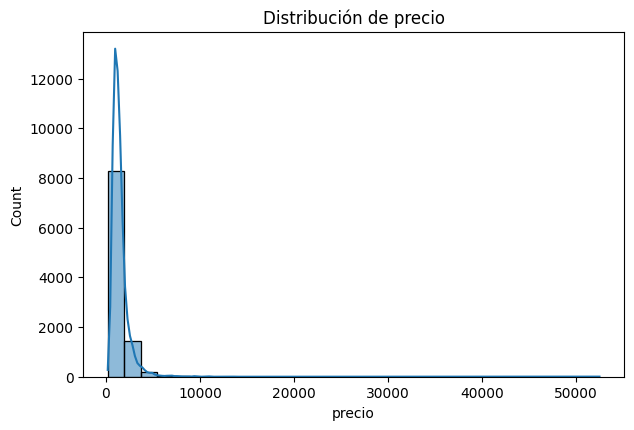

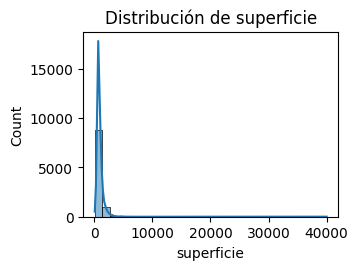

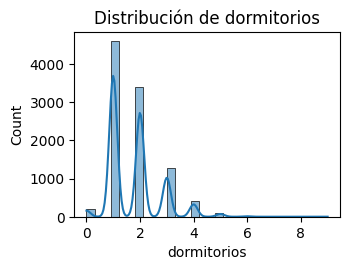

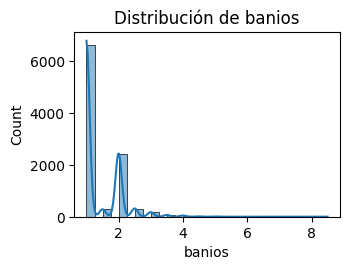

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
for i, col in enumerate(columnas):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col].dropna(),bins=30,kde=True)
  plt.title(f'Distribución de {col}')
  plt.tight_layout()
  plt.show()

DISTRIBUCION DE PRECIO

Este grafico muestra la distribución de los precios de las propiedades en alquiler, se ve una concentración de los datos en precios bajos. Los precios e concentran entre $0 y $10,000. El precio mas alto es $52,500.

DISTRIBUCION DE SUPERFICIE

Este grafico muestra la distribución de las superficies de las propiedades en alquiler, se ve una concentración de los datos en valores bajos también.
Manteniéndose entre 0 y 5000 en su mayoria.

DISTRIBUCION DE DORMITORIOS

Este grafico muestra la distribución de dormitorios de las propiedades en alquiler, se ve una concentración de los datos en valores bajos también. Entre 1 y 4.

DISTRIBUCION DE BAÑOS
Este grafico muestra la distribución de baños de las propiedades en alquiler.
Entre 0 y 2 se concentran los datos

Seguramente mas adelante veamos algunos outliers. Pero en resumen los datos se mantienene en niveles bajos respecto a sus variables, tiene sentido que en su MAYORIA sea asi, porque son apartamentos.

##**Deteccion de outliers mediante boxplot**

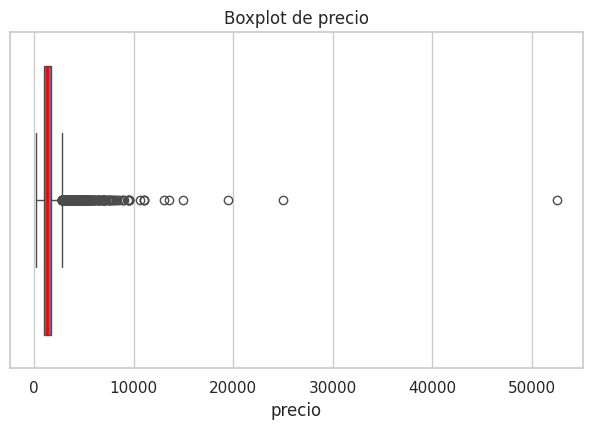

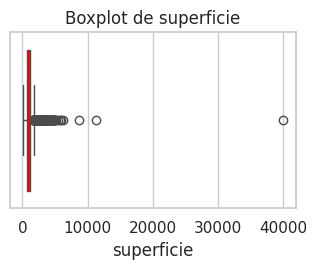

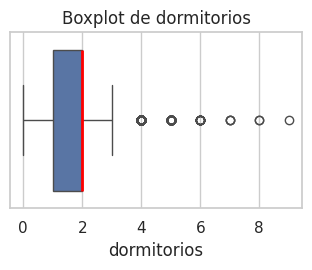

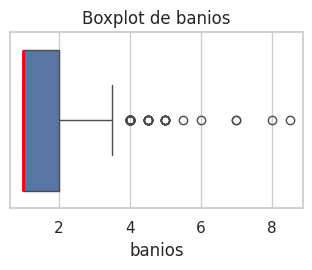

In [57]:
plt.figure(figsize=(12,8))
for i, col in enumerate(columnas):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df[col], medianprops={'color':'red','linewidth':2})
  plt.title(f'Boxplot de {col}')
  plt.tight_layout()
  plt.show()

Los boxplots muestran bastantes outliers en todos los graficos. Esto estimo que se debe a la variabilidad de departamentos en cuanto a las caracteristicas. Los tenemos en cuenta para el punto 3.

**En resumen,** se observan distribuciones sesgadas a la derecha y presencia de outliers significativos. Lo veo comun teniendo en cuenta el tema del dataset, y sus amplia propuesta de departamentos.

##**Grafico de dispersion**

Como no existe una columna explicita para el 'target', asumiremos que es la columna 'precio' que es una variable clave, asi analizaremos su relacion con las otras.

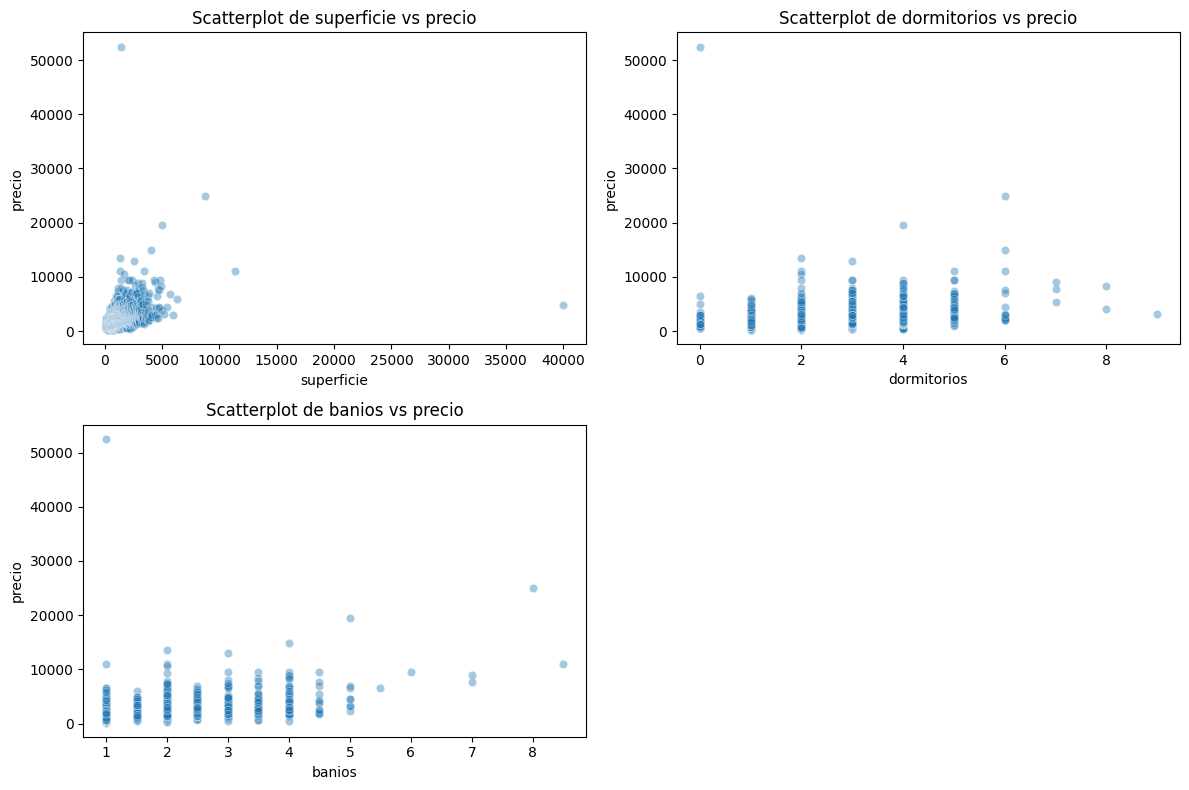

In [8]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['superficie','dormitorios','banios']):
  plt.subplot(2,2,i+1)
  sns.scatterplot(data=df, x=col,y='precio',alpha=0.4)
  plt.title(f'Scatterplot de {col} vs precio')

plt.tight_layout()
plt.show()

En estos graficos podemos ver la relación entre **price** y las otras **3 columnas**.

**SUPERFICIE VS PRECIO**

Podemos ver como al aumnetar la superfie el precio tambien tiende a aumentar, esto es una relacion positiva. Sin embargo vemos muchos **outliers extremos**, algunos que la verdad no tienen sentido como un departamento que cuesta mas de 50.000 y tiene una superficie de menos de 25.000. O uno que tiene como superficie 40.000 y cuesta menos de 10.000.


**DORMITORIOS VS PRECIO**
Lo primero

####**Quiero definir si los valores 0 en la columna dormitorios se debe a un error o a un alquiler grande que no tiene habitaciones en si, sino un espacio amplio sin diviciones, generalmente departamentos modernos y caros**

In [9]:
#Veamos cuantas filas son las que tienen 0 dormitorios
filas_cero_dormitorios = df[df['dormitorios'] == 0]
print(filas_cero_dormitorios)

              id                category  \
0     5668626895  housing/rent/apartment   
2     5668626833  housing/rent/apartment   
3     5659918074  housing/rent/apartment   
4     5668626759  housing/rent/apartment   
5     5667891676  housing/rent/apartment   
...          ...                     ...   
8750  5668638203  housing/rent/apartment   
8829  5666447277  housing/rent/apartment   
8873  5668634793  housing/rent/apartment   
9064  5664595593  housing/rent/apartment   
9658  5659918509  housing/rent/apartment   

                                                  title  \
0     Studio apartment 2nd St NE, Uhland Terrace NE,...   
2     Studio apartment N Scott St, 14th St N, Arling...   
3                        Studio apartment 1717 12th Ave   
4     Studio apartment Washington Blvd, N Cleveland ...   
5                             0 BR in New York NY 10019   
...                                                 ...   
8750                   Studio apartment 10 Santa Fe Ave   

In [11]:
#Ahora veamos los precios que tienen esas filas
precios_cero_dormitorios = filas_cero_dormitorios['precio']
print(precios_cero_dormitorios)

0         790
2        1390
3         925
4         880
5        2475
        ...  
8750     3000
8829    52500
8873     1000
9064     1375
9658     1325
Name: precio, Length: 198, dtype: int64


####**Vamos a hacer un grafico para ver como cambia el precio en departamentos con 0 hbaitaciones y con una habitacion**

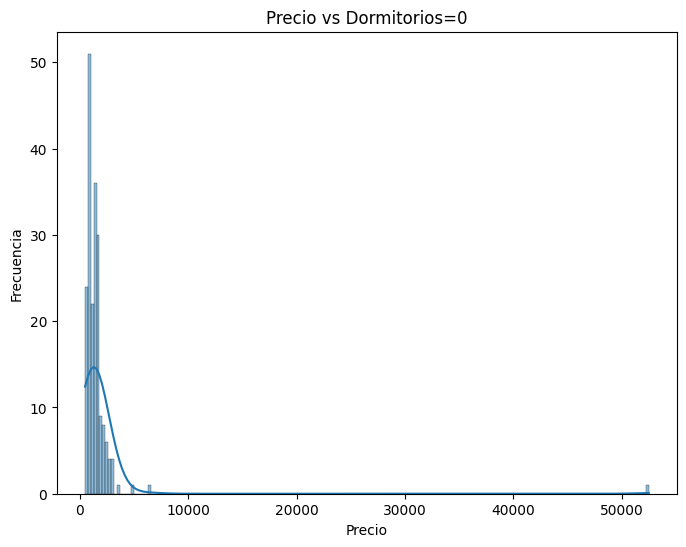

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(filas_cero_dormitorios['precio'],kde=True)
plt.title('Precio vs Dormitorios=0')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

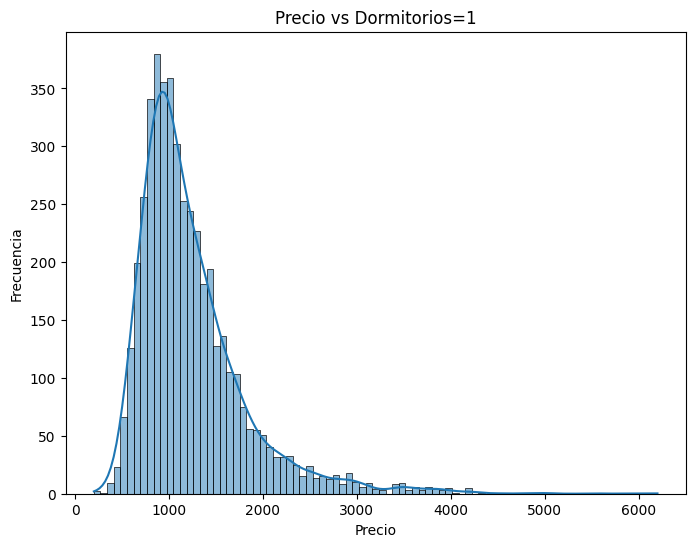

In [13]:
filas_un_dormitorios=df[df['dormitorios']==1]

plt.figure(figsize=(8,6))
sns.histplot(filas_un_dormitorios['precio'],kde=True)
plt.title('Precio vs Dormitorios=1')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Por lo que veo con estos graficos el precio de los departamentos con cero dormitorios se encuentran en niveles bajos respecto al precio. Hay outliers, los vimos en todos los graficos que hicimos. Voy a optar por pensar ques estos deaprtamentos no tienen dormitorios porque son monoambientes, lo que si trabajaremos los outliers.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

###**Verificamos que no existan missing values**

In [14]:
df.isnull().sum()

,0
id,0
category,0
title,0
descripcion,0
comodidades,3549
banios,34
dormitorios,7
moneda,0
tarifa,0
tiene_foto,0


####**Vamos a tratar los valores null de las columnas que ya venimos viendo (que son con las que trabajaremos todo el TP2), primeros los pasamos a NaN, y luego los vamos a eliminar**

In [16]:
df_cluster=df[columnas].copy() #Creamos una copia para modificar solo esa y no la original

#Convertimos las columnas a numerico por las dudas, es importante para trabajar con Z-Score
df_cluster=df_cluster.apply(pd.to_numeric, errors='coerce')

#Eliminamos valores null
df_cluster.dropna(inplace=True)
df_cluster.reset_index(drop=True,inplace=True)
df_cluster.isnull().sum() #Confirmamos

,0
precio,0
superficie,0
dormitorios,0
banios,0


####**Aplicamos Z-Score**

In [17]:
from scipy.stats import zscore

z_scores=zscore(df_cluster)
df_zscore=pd.DataFrame(z_scores,columns=df_cluster.columns)
df_zscore.head()

,precio,superficie,dormitorios,banios
0,-0.090194,-1.587811,-1.85604,-0.618269
1,-0.521950,-1.570715,-1.85604,-0.618269
2,0.917236,-1.544123,-1.85604,-0.618269
3,0.007299,-1.528927,-1.85604,-0.618269
4,0.193001,-1.430155,-1.85604,-0.618269


####**Seleccionamos umbral para mascara de Z-Score**

Esto lo fui probando, comence con un umbral de 3 pero dejaba demaciados outliers. Elegi el 2.5.

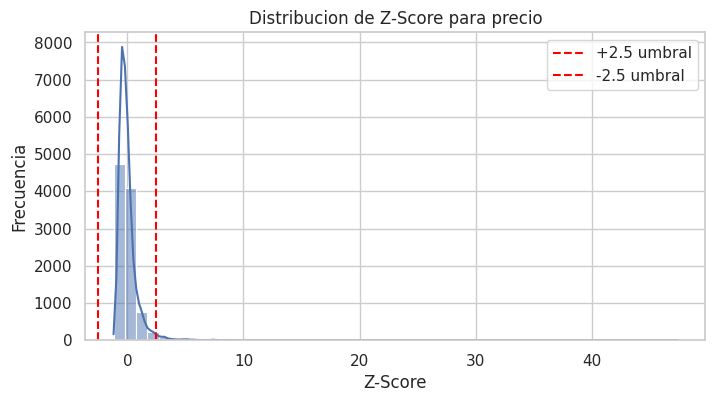

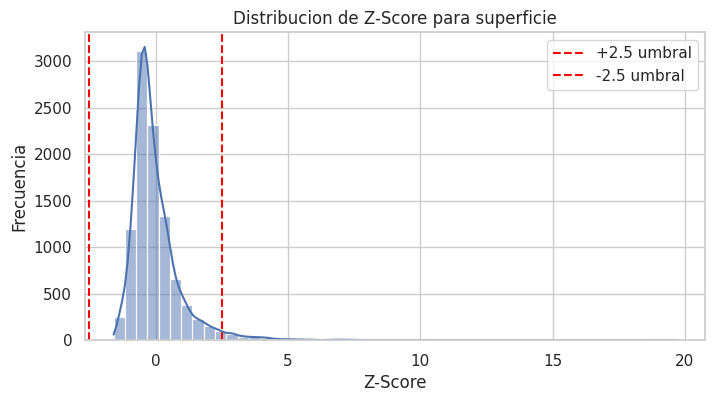

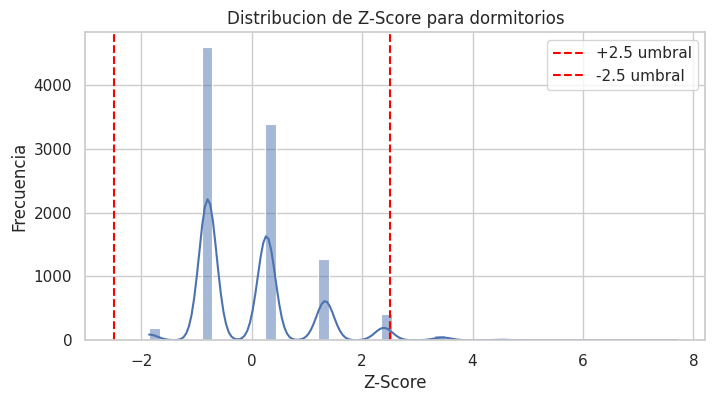

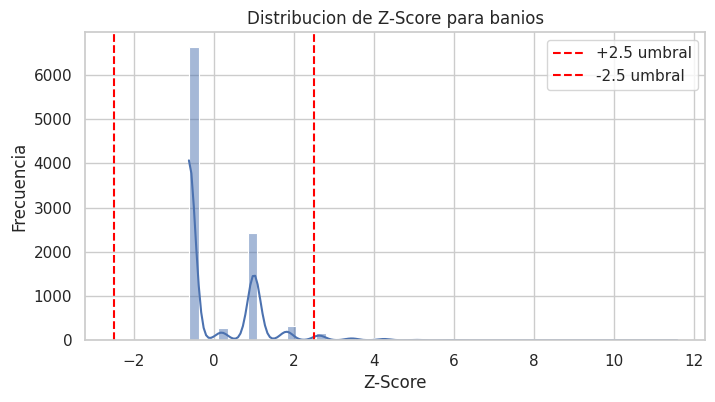

In [62]:
for var in columnas:
  plt.figure(figsize=(8,4))
  sns.histplot(df_zscore[var],bins=50,kde=True)
  plt.axvline(2.5,color='red',linestyle='--',label='+2.5 umbral')
  plt.axvline(-2.5,color='red',linestyle='--',label='-2.5 umbral')
  plt.title(f'Distribucion de Z-Score para {var}')
  plt.xlabel('Z-Score')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.grid(True)
  plt.show()

####**Identificamos outliers** de valores z-score mayores a 3 y menores a -3

In [63]:
mask=((df_zscore<2.5) & (df_zscore>-2.5)).all(axis=1)

####**Filtramos solo las filas sin outliers**

In [64]:
df_cluster_clean=df_cluster[mask].reset_index(drop=True)

#Confirmamos el tamaño de los df
print("Tamaño original:", df_cluster.shape)
print('Filtrado sin outliers:',df_cluster_clean.shape)

Tamaño original: (9959, 4)
Filtrado sin outliers: (9421, 4)


####**Hacemos devuelta el grafico de Z-Score para verificar que los datos estan dentro de las lineas.**

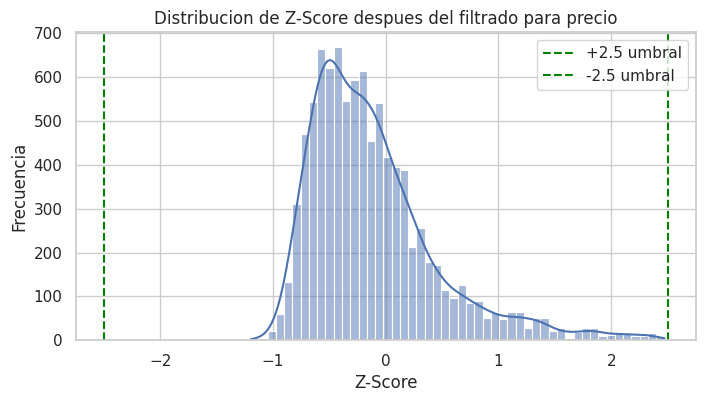

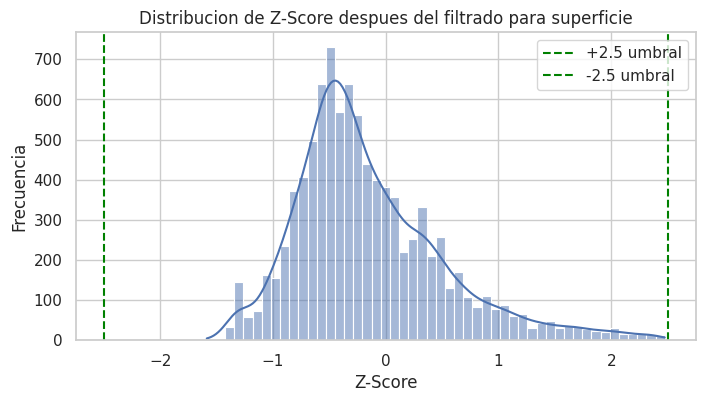

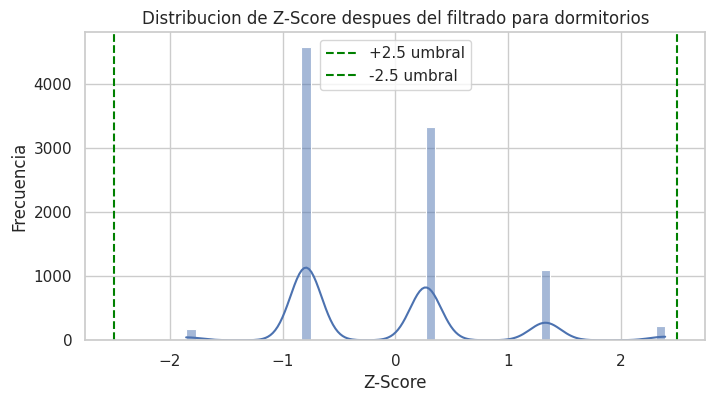

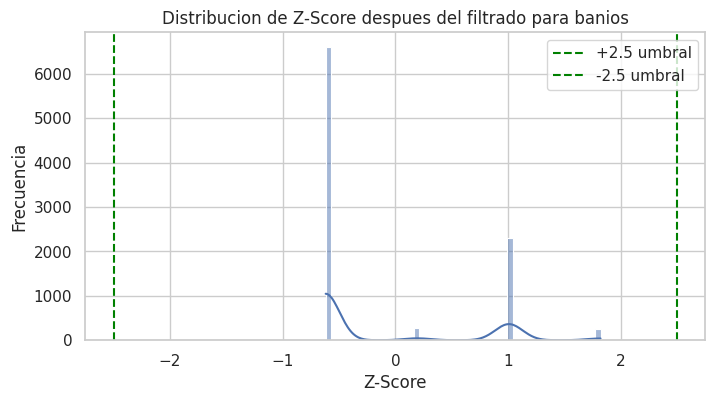

In [67]:
df_zcore_clean=df_zscore[mask].reset_index(drop=True)

for var in columnas:
  plt.figure(figsize=(8,4))
  sns.histplot(df_zcore_clean[var],bins=50,kde=True)
  plt.axvline(2.5,color='green',linestyle='--',label='+2.5 umbral')
  plt.axvline(-2.5,color='green',linestyle='--',label='-2.5 umbral')
  plt.title(f'Distribucion de Z-Score despues del filtrado para {var}')
  plt.xlabel('Z-Score')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.grid(True)
  plt.show()

* En conclusion de detectaron y eliminaron otliers extremos, sin perder tantos datos.
* Filtramos los datos para eliminar valores extremos.
* Y graficamos la distribucion de Z-score antes y despues de filtrarlo.

* Normalizamos ademas usando el metodo StandardScaler|

## 4. **Clustering**  

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

####**Antes de comenzar como para completar la normalizar las variables vamos a aplicar StandarScaler**

In [70]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_cluster_clean)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.

####**Determinamos el numero ideal de clusters**

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scores=[]
k_values=range(2,10)

for k in k_values:
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=0)
  kmeans.fit(df_scaled)
  score=silhouette_score(df_scaled,kmeans.labels_)
  scores.append(score)

####**Visualizamos**

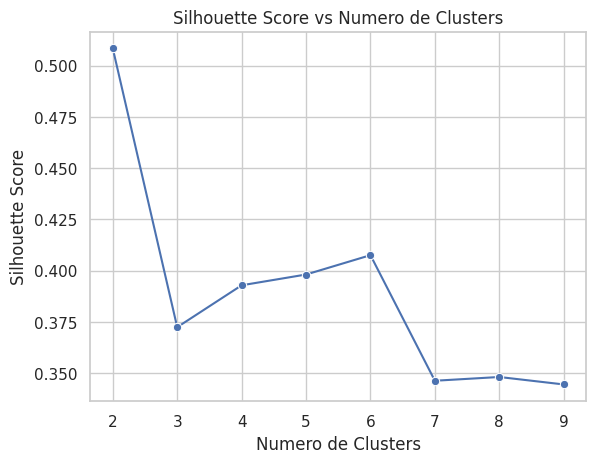

El numero ideal de clusters es: 2


In [73]:
sns.set(style='whitegrid')
sns.lineplot(x=k_values,y=scores,marker='o')
plt.title('Silhouette Score vs Numero de Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k=k_values[np.argmax(scores)]
print(f'El numero ideal de clusters es: {best_k}')

Utilizamos el metodo de Silhouette Score para determinar el numero de ideal de clusters, variando k entre 2 y 9. El punto mayor lo vemos en 2, asi que usaremos ese k=2

####**Aplicamos K-means con el numero ideal de cluster segun el metodo de Silhouette Score**

In [75]:
kmeans_final=KMeans(n_clusters=2,n_init=10,random_state=42)
df_cluster_clean['cluster']=kmeans_final.fit_predict(df_scaled) #Veremos los resultados de los clusters en el df limpio
df_cluster_clean


,precio,superficie,dormitorios,banios,cluster
0,1390,107,0.0,1.0,0
1,925,116,0.0,1.0,0
2,2475,130,0.0,1.0,0
3,1495,138,0.0,1.0,0
4,1695,190,0.0,1.0,0
...,...,...,...,...,...
9416,1399,2220,3.0,2.0,1
9417,1599,2238,3.0,2.0,1
9418,1825,2239,4.0,2.0,1
9419,1750,2242,3.0,2.0,1


### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

####**Analizamos las caracteristicas de cada cluster con graficos boxplots**

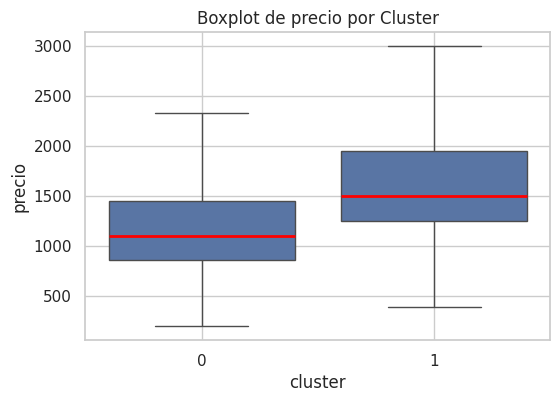

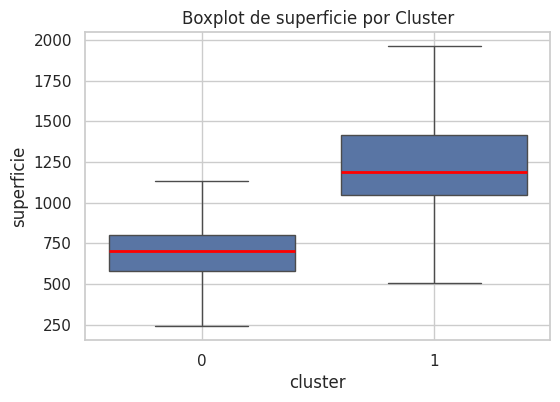

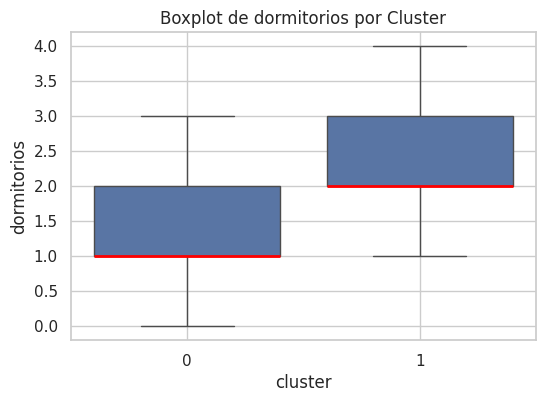

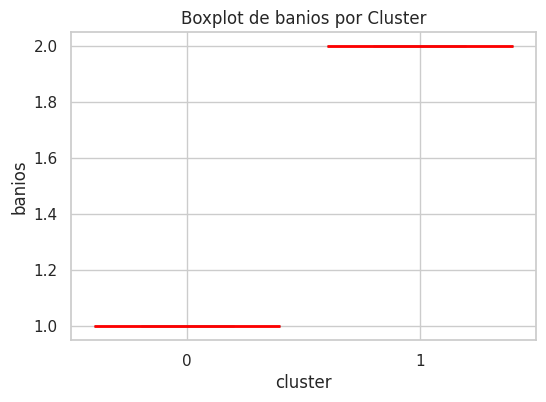

In [76]:
for col in df_cluster_clean.columns[:-1]: #omitimos la columna cluster
  plt.figure(figsize=(6,4))
  sns.boxplot(x='cluster',y=col,data=df_cluster_clean,showfliers=False, medianprops={'color':'red','linewidth':2})
  plt.title(f'Boxplot de {col} por Cluster')
  plt.grid(True)
  plt.show()

**Analisis de Boxplot:**

**PRECIO-CLUSTERS:**
-Cluster 0 tiene precios mas bajos que el Cluster 1 con una mediana $1100 aproximadamente. Se puede ver una  dispersión menor

-Cluster 1 tiene precios mas altos con una mediana de 1500 aproximadamente y una mayor dispersión pero no tan diferente.

Podemos observar como los valores max en el Cluster 1 pueden llegar a $3000 y como mínimo aproximado 450. Y el máximo precio del Cluster 0 no llega a 2500. Podemos ver que el Cluster 1 agrupa a los departamentos mas caros y el Cluster 0 a los mas económicos.


**SUPERFICIE-CLUSTERS:**
- Cluster 0 tiene superficies más bajas que el Cluster 1 con una mediana de 700 de superficie aproximadamente. Se puede ver una dispersión menor.

- Cluster 1 tiene superficies más altas con una mediana de 1180 de superficie aproximadamente y una mayor dispersión.

Podemos observar cómo los valores máximos en el Cluster 1 pueden llegar aproximadamente a 2000 de superficie y como mínimo aproximado 500 de superficie. Y el máximo de superficie del Cluster 0 no llega a 1250 unidades de superficie. Podemos ver que el Cluster 1 agrupa a los departamentos con superficies más grandes y el Cluster 0 a los de superficies más pequeñas.

**DORMITORIOS-CLUSTERS:**
-Cluster 0 tiene una cantidad de dormitorios menor que el Cluster 1, con una mediana de 1 dormitorio aproximadamente. Una máxima de 3 a comparación del Cluster 1 que tiene 4.


**BAÑOS-CLUSTERS:**
-Cluster 0 tiene una cantidad de baños notablemente menor que el Cluster 1. La mediana se sitúa exactamente en 1 baño. La caja se extiende desde aproximadamente 1 a 1 baño, lo que indica que la mayoría de las propiedades en este cluster tienen exactamente 1 baño y una dispersión muy baja.


-Cluster 1 tiene una cantidad de baños mayor. La mediana se encuentra en 2 baños. No podemos ver una caja como los demás graficos porque los valores en la columna 'banios' solo tiene 3 variables[1,1.5,2].



---



## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

###**Aplicaremos PCA (Analisis de Componentes Principales)**

In [78]:
#Importamos la clase PCA de sklearn
from sklearn.decomposition import PCA

####**Reducimos a 2D**

In [79]:
#Definimos el numero de componentes en la variable objeto
pca2=PCA(n_components=2, random_state=42)

#Generamos coordenadas 'PC1','PC2'
coords=pca2.fit_transform(df_scaled)
df_pca2=pd.DataFrame(coords,columns=['PC1','PC2'])#C9onvertimos a df
df_pca2['cluster']=df_cluster_clean['cluster']#Añadimos la columna 'cluster'


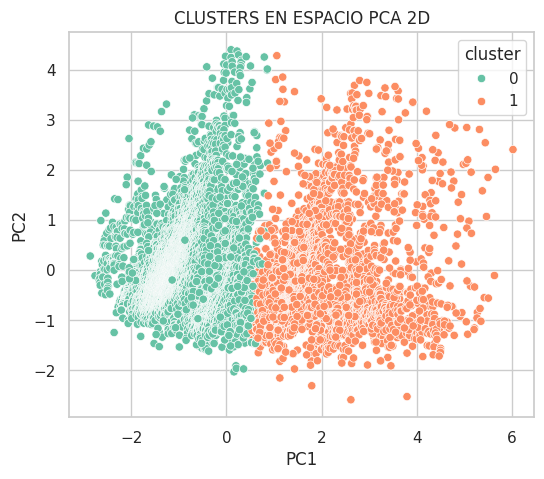

In [80]:
#Graficamos la dispersion en 2D usando PC1 y PC2
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca2,x='PC1',y='PC2',hue='cluster',palette='Set2')
plt.title('CLUSTERS EN ESPACIO PCA 2D')
plt.grid(True)
plt.show()

**Podemos ver una clara diferenciacion de colore, donde el CLUSTER 0 SE IDENTIFICA CON EL COLOR VERDE Y EL CLUSTER 1 CON NARANJA**


####**Reducimos a 3D**

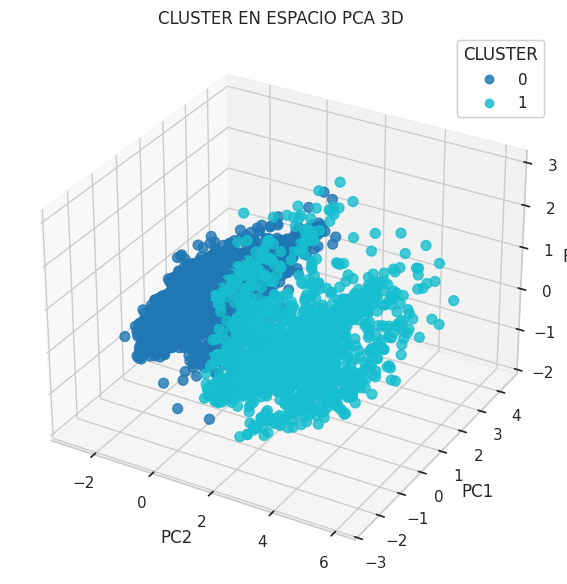

In [81]:
from mpl_toolkits.mplot3d import Axes3D #herramienta para trabajar con grafico 3d
pca3=PCA(n_components=3, random_state=42)
coords3=pca3.fit_transform(df_scaled)
#Nuevo dataframe para el 3d
df_pca3=pd.DataFrame(coords3,columns=['PC1','PC2','PC3'])
df_pca3['cluster']=df_cluster_clean['cluster']

#Graficamos en 3d
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(
    df_pca3['PC1'],df_pca3['PC2'],df_pca3['PC3'],
    c=df_pca3['cluster'],cmap='tab10',s=50,alpha=0.8
)

ax.set_title('CLUSTER EN ESPACIO PCA 3D')
ax.set_ylabel('PC1')
ax.set_xlabel('PC2')
ax.set_zlabel('PC3')
legend1=ax.legend(*scatter.legend_elements(),
                  title='CLUSTER',loc='upper right')

ax.add_artist(legend1)
plt.tight_layout()
plt.show()

###**Seguimos notando una diferencia clara enre los dos clusters, todo indica que se hizo un buen trabajo**

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

####**HAREMOS LO MISMO QUE HICIMOS EN EL PUNTO 4 PERO USASNDO EL DATASET DE LAS COORDENADAS REDUCIDAS, COMO EL PCA 2D**

####**Calculamos Silhouette Score y obtenemos el mismo numero de k que en el calculo del punto 4**

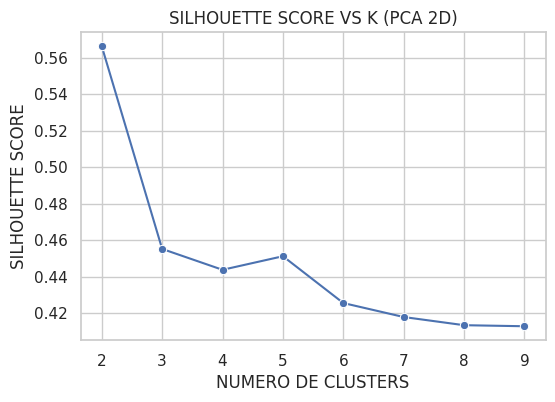

In [82]:
scores_pca2=[]
K=range(2,10)

for k in K:
  km=KMeans(n_clusters=k, random_state=42,n_init=10)
  labels=km.fit_predict(df_pca2[['PC1','PC2']])
  scores_pca2.append(silhouette_score(df_pca2[['PC1','PC2']],labels))

#Graficamos
plt.figure(figsize=(6,4))
sns.lineplot(x=K,y=scores_pca2,marker='o')
plt.title('SILHOUETTE SCORE VS K (PCA 2D)')
plt.xlabel('NUMERO DE CLUSTERS')
plt.ylabel('SILHOUETTE SCORE')
plt.grid(True)
plt.show()

In [83]:
#Aplicamos KMeans
kmeans_pca2=KMeans(n_clusters=2,n_init=10,random_state=42)
df_pca2['cluster_pca2']=kmeans_pca2.fit_predict(df_pca2[['PC1','PC2']])

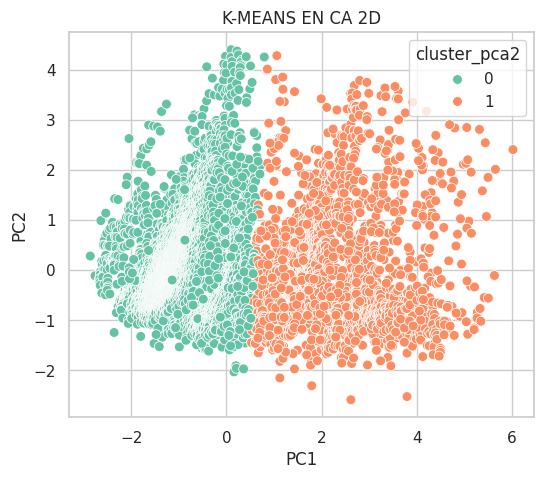

In [84]:
#Graficamos
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca2,x='PC1',y='PC2',hue='cluster_pca2',palette='Set2',s=50)
plt.title('K-MEANS EN CA 2D')
plt.grid(True)
plt.show()

####**El grafico es muy parecido al anterior que obtuvimos**

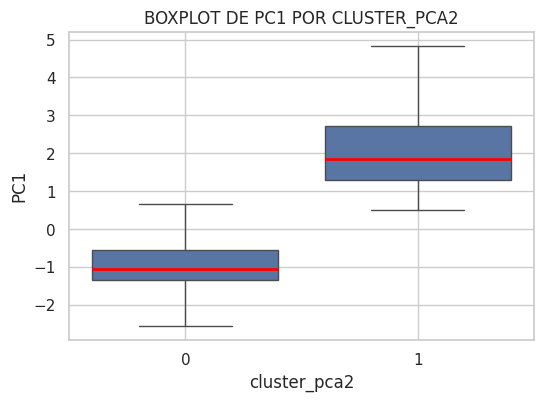

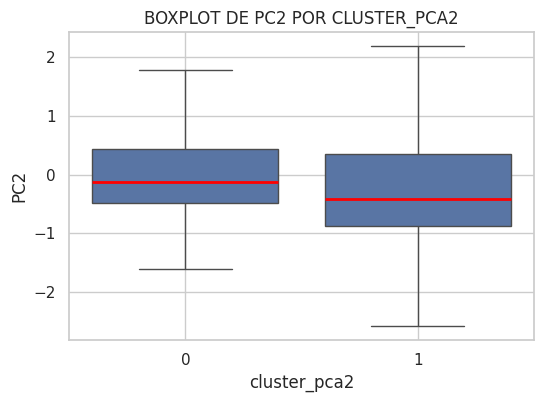

In [88]:
#Analisis intracluster en PCA 2D
for col in ['PC1','PC2']:
  plt.figure(figsize=(6,4))
  sns.boxplot(x='cluster_pca2',y=col,
              data=df_pca2,showfliers=False,medianprops={'color':'red','linewidth':2})
  plt.title(f'BOXPLOT DE {col} POR CLUSTER_PCA2')
  plt.grid(True)
  plt.show()

####**En el 1er grafico vemos en el eje X los clusters 0 y 1. Y en el eje Y a PC1 (PRIMER COMPONENTE PRINCIPAL)**

* El cluster 0 tiene una mediana de aproximadamente en -1 y un rango de aprox -2.5 hasta casi 0.5.

* El cluster 1 tiene una mediana de aproximadamente en 2 y un rango de aprox 0.5 hasta casi 5.

Podemos ver que PC1 separa muy bien los dos clusters.


####**En el 2do grafico:**

* El cluster 0 tiene una mediana de casi 0 y un rango aprox de entre -2.1 a 1.7

* El cluster 1 tiene una mediana de -0.5 y un rango aprox de entre -2.5 y 2.3.


**IMPORTANTE**

Podemos ver que en el grafico 1 los clusters no se sobreponen pero en el grafico 2 si, lo que nos indica que el PC2 no separa bien los rangos de los clusters entre si, podemos ver una cala separacion de grupos mas en el grafico que en el 2.

Podemos decir que PC1 capta la mayor parte de las diferencias entre departamentos, teniendo en cuenta tamaño, precio, cantidad de baños y de dormitorios

En el PC2 lso clústeres comparten casi el mismo rango, eso significa que hay solapamiento entre ellos. Este si separa pero no mas que el PC1

## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

Aplicamos clustering en el dataset original y en el reducido con PCA, los resultados no variaron drasticamente. Logre identificar dos grupos que diferencian grupos de deptos mas economicos y mas caros, siendo que proporcionalmente los mas grandes tenian mas baños, mas dormitorios y mas superficie.
Me parece que se llego a un buen reconocmiento de agrupaciones en los datos, y los resultados son muy coherentes. De igual manera este resultado obtenido fue tambien gracias al procesamiento que se le dio a los datos, como eliminacion de nulls, outliers, etc.

El dataset que elegi para trabajar no contiene clases(columnas) reales, esto significa que al aplicar clustering, los dos clusters se formaron sin conocer ninguna clase previa.

La reduccion de dimencionalidad no empeoro los resultados del clustering. En cambio, ayudo a visualizar mejor los grupos formados. Los resultados fueron buenos a mi parecer.